In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
type(model)

sklearn.linear_model._base.LinearRegression

In [20]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('tasico_Entire_Home_Apt.csv')

In [21]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No hay porcentaje de aceptacion", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

float64


In [22]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_19024\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [23]:
df = df.select_dtypes(include=['float', 'int64']) 


In [24]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,host_total_listings_count,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
Unnamed: 0,1.000000,0.094322,-0.066872,-0.046899,0.078405,0.891280,0.342381,0.023164,-0.010982,0.038609,...,0.152295,0.218743,0.226074,0.146313,0.010967,-0.041263,NaN,NaN,0.029162,NaN
host_acceptance_rate,0.094322,1.000000,0.403230,0.198763,0.141748,0.089980,0.005681,0.080600,0.038248,0.023111,...,-0.048283,-0.108692,-0.124966,-0.004750,0.117692,0.082171,NaN,NaN,0.255117,NaN
host_is_superhost,-0.066872,0.403230,1.000000,0.141777,0.051494,-0.081611,-0.084370,0.043960,0.002031,-0.072637,...,0.058632,-0.053944,-0.022451,-0.001741,0.096200,0.113454,NaN,NaN,0.322458,NaN
host_identity_verified,-0.046899,0.198763,0.141777,1.000000,0.063093,-0.055212,-0.074141,0.075333,0.016431,0.014411,...,-0.053855,-0.070117,-0.068917,-0.022502,0.071807,0.063440,NaN,NaN,0.098527,NaN
instant_bookable,0.078405,0.141748,0.051494,0.063093,1.000000,0.057887,0.072335,0.155284,0.191294,0.015694,...,-0.064662,-0.038049,-0.091886,0.018057,0.173157,0.135616,NaN,NaN,0.029674,NaN
id,0.891280,0.089980,-0.081611,-0.055212,0.057887,1.000000,0.268834,0.009285,-0.017987,0.039935,...,0.145259,0.211030,0.217645,0.120651,0.000092,-0.045319,NaN,NaN,0.007903,NaN
host_id,0.342381,0.005681,-0.084370,-0.074141,0.072335,0.268834,1.000000,-0.044413,-0.035252,0.038621,...,0.052993,0.057892,-0.000968,0.019147,-0.017153,-0.003557,NaN,NaN,0.013558,NaN
host_listings_count,0.023164,0.080600,0.043960,0.075333,0.155284,0.009285,-0.044413,1.000000,0.790819,0.003448,...,-0.078217,-0.021259,-0.091721,0.007096,0.868384,0.663015,NaN,NaN,-0.080673,NaN
host_total_listings_count,-0.010982,0.038248,0.002031,0.016431,0.191294,-0.017987,-0.035252,0.790819,1.000000,0.029830,...,-0.097252,-0.019155,-0.099979,0.011046,0.704207,0.527707,NaN,NaN,-0.110943,NaN
accommodates,0.038609,0.023111,-0.072637,0.014411,0.015694,0.039935,0.038621,0.003448,0.029830,1.000000,...,-0.159673,-0.025728,-0.070776,0.015766,-0.001866,-0.015970,NaN,NaN,-0.058069,NaN


In [25]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,host_total_listings_count,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
Unnamed: 0,1.000000,0.094322,0.066872,0.046899,0.078405,0.891280,0.342381,0.023164,0.010982,0.038609,...,0.152295,0.218743,0.226074,0.146313,0.010967,0.041263,NaN,NaN,0.029162,NaN
host_acceptance_rate,0.094322,1.000000,0.403230,0.198763,0.141748,0.089980,0.005681,0.080600,0.038248,0.023111,...,0.048283,0.108692,0.124966,0.004750,0.117692,0.082171,NaN,NaN,0.255117,NaN
host_is_superhost,0.066872,0.403230,1.000000,0.141777,0.051494,0.081611,0.084370,0.043960,0.002031,0.072637,...,0.058632,0.053944,0.022451,0.001741,0.096200,0.113454,NaN,NaN,0.322458,NaN
host_identity_verified,0.046899,0.198763,0.141777,1.000000,0.063093,0.055212,0.074141,0.075333,0.016431,0.014411,...,0.053855,0.070117,0.068917,0.022502,0.071807,0.063440,NaN,NaN,0.098527,NaN
instant_bookable,0.078405,0.141748,0.051494,0.063093,1.000000,0.057887,0.072335,0.155284,0.191294,0.015694,...,0.064662,0.038049,0.091886,0.018057,0.173157,0.135616,NaN,NaN,0.029674,NaN
id,0.891280,0.089980,0.081611,0.055212,0.057887,1.000000,0.268834,0.009285,0.017987,0.039935,...,0.145259,0.211030,0.217645,0.120651,0.000092,0.045319,NaN,NaN,0.007903,NaN
host_id,0.342381,0.005681,0.084370,0.074141,0.072335,0.268834,1.000000,0.044413,0.035252,0.038621,...,0.052993,0.057892,0.000968,0.019147,0.017153,0.003557,NaN,NaN,0.013558,NaN
host_listings_count,0.023164,0.080600,0.043960,0.075333,0.155284,0.009285,0.044413,1.000000,0.790819,0.003448,...,0.078217,0.021259,0.091721,0.007096,0.868384,0.663015,NaN,NaN,0.080673,NaN
host_total_listings_count,0.010982,0.038248,0.002031,0.016431,0.191294,0.017987,0.035252,0.790819,1.000000,0.029830,...,0.097252,0.019155,0.099979,0.011046,0.704207,0.527707,NaN,NaN,0.110943,NaN
accommodates,0.038609,0.023111,0.072637,0.014411,0.015694,0.039935,0.038621,0.003448,0.029830,1.000000,...,0.159673,0.025728,0.070776,0.015766,0.001866,0.015970,NaN,NaN,0.058069,NaN


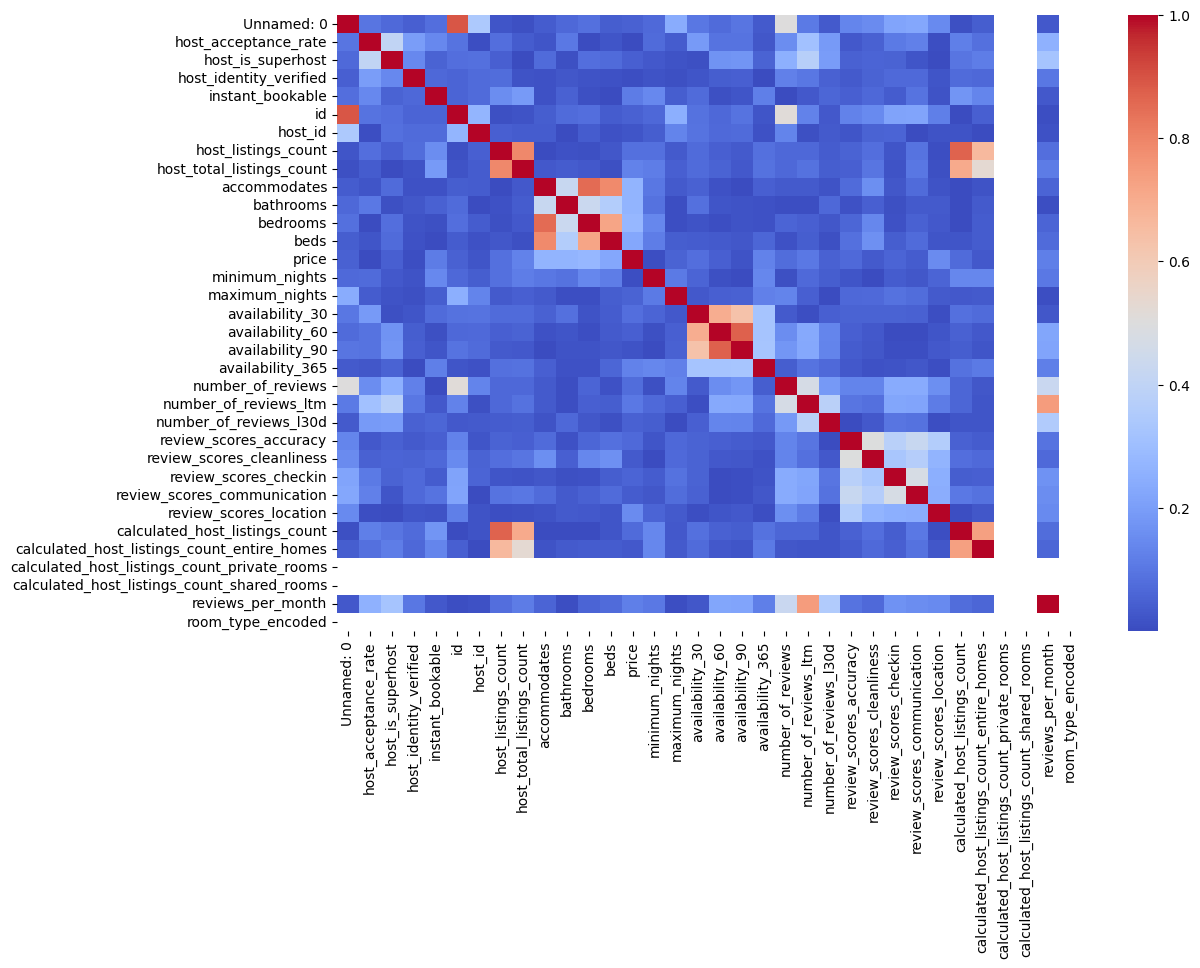

In [26]:
# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm', annot_kws={"size": 8})

# Mostramos el mapa de calor
plt.show()

Regresión multiple host_acceptance_rate

<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

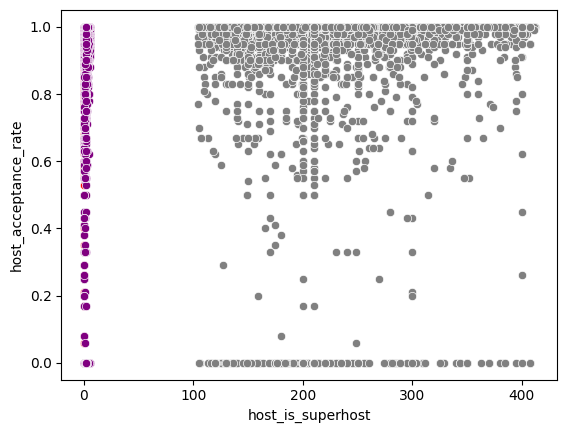

In [27]:
from turtle import color
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='host_acceptance_rate', color="purple", data=df)
sns.scatterplot(x='price', y='host_acceptance_rate', color="grey", data=df)

In [28]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'reviews_per_month','price']]
Var_Dep= df['host_acceptance_rate']

In [29]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [30]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([2.08774467e-01, 3.17066144e-02, 1.61153978e-04]),
 'rank_': 3,
 'singular_': array([4663.65140847,   96.07292594,   34.09945739]),
 'intercept_': np.float64(0.6698403247664383)}

In [31]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.18130218191170688

In [32]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_is_superhost', 'reviews_per_month','price']])
y_pred

array([0.96706723, 1.01956124, 0.79364692, ..., 0.98966938, 0.73835026,
       0.73673872], shape=(5415,))

In [33]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples1', y_pred)
df

,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0.967067,1,1.00,1,1,1,84581,461471.0,1.00,1.00,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,1.019561,2,0.96,1,1,0,88873,485048.0,1.00,1.00,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,0.793647,3,0.99,0,1,1,137808,673625.0,2.00,5.00,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,0.913463,4,1.00,1,1,0,252996,1090010.0,2.00,3.00,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,0.920621,6,1.00,1,1,1,270374,1090010.0,2.00,3.00,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,0.743185,6225,0.98,0,1,0,1234371078098610539,151936855.0,2.00,2.00,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,0.967752,6226,1.00,1,1,1,1234536628221406790,96784548.0,2.56,3.23,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,0.989669,6227,0.90,1,1,0,1235102258503641649,49758789.0,3.00,3.00,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,0.738350,6228,0.00,0,1,1,1235296169504767618,9765814.0,1.00,2.00,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

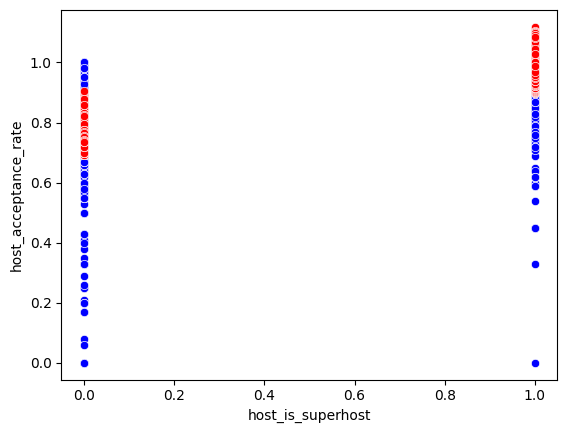

In [34]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='PrediccionesMultiples1', color="red", data=df)


In [35]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18130218191170688

In [36]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.42579593928513093)

Regresión multiple host_is_superhost

<Axes: xlabel='bedrooms', ylabel='host_is_superhost'>

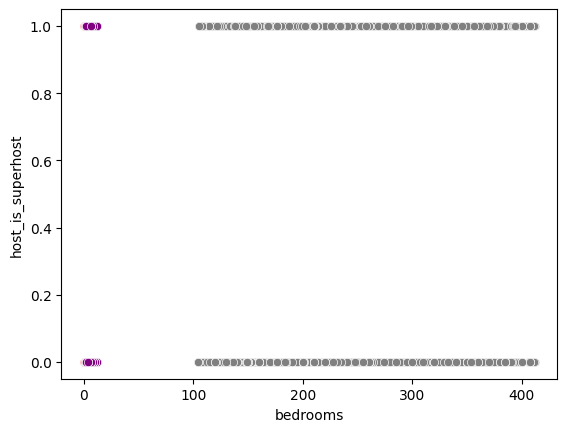

In [37]:
from turtle import color
sns.scatterplot(x='bedrooms', y='host_is_superhost', color="red", data=df)
sns.scatterplot(x='accommodates', y='host_is_superhost', color="purple", data=df)
sns.scatterplot(x='price', y='host_is_superhost', color="grey", data=df)

In [38]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'accommodates','price']]
Var_Dep= df['host_is_superhost']

In [39]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [40]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'accommodates', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.02447801, -0.00400427, -0.00019419]),
 'rank_': 3,
 'singular_': array([4663.90559856,  177.71542606,   39.37325499]),
 'intercept_': np.float64(0.6939027546078365)}

In [41]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.006835848768117714

In [42]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['bedrooms', 'accommodates','price']])
y_pred

array([0.52636886, 0.60465648, 0.562498  , ..., 0.51993405, 0.6361721 ,
       0.6056274 ], shape=(5415,))

In [43]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples2', y_pred)
df

,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0.526369,0.967067,1,1.00,1,1,1,84581,461471.0,1.00,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,0.604656,1.019561,2,0.96,1,1,0,88873,485048.0,1.00,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,0.562498,0.793647,3,0.99,0,1,1,137808,673625.0,2.00,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,0.640056,0.913463,4,1.00,1,1,0,252996,1090010.0,2.00,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,0.634304,0.920621,6,1.00,1,1,1,270374,1090010.0,2.00,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,0.630347,0.743185,6225,0.98,0,1,0,1234371078098610539,151936855.0,2.00,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,0.611316,0.967752,6226,1.00,1,1,1,1234536628221406790,96784548.0,2.56,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,0.519934,0.989669,6227,0.90,1,1,0,1235102258503641649,49758789.0,3.00,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,0.636172,0.738350,6228,0.00,0,1,1,1235296169504767618,9765814.0,1.00,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='bedrooms', ylabel='host_is_superhost'>

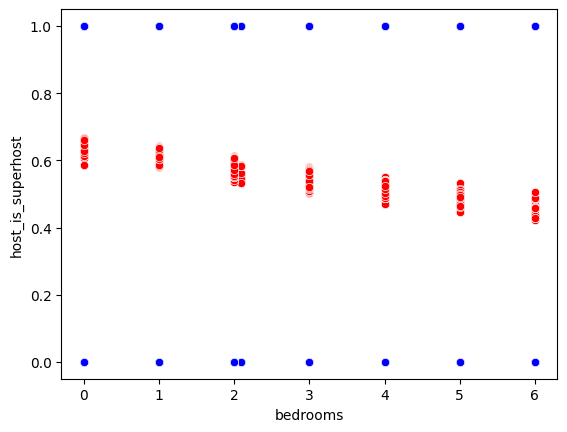

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='PrediccionesMultiples2', color="red", data=df)


Regresión multiple host_total_listings_count

<Axes: xlabel='host_is_superhost', ylabel='host_total_listings_count'>

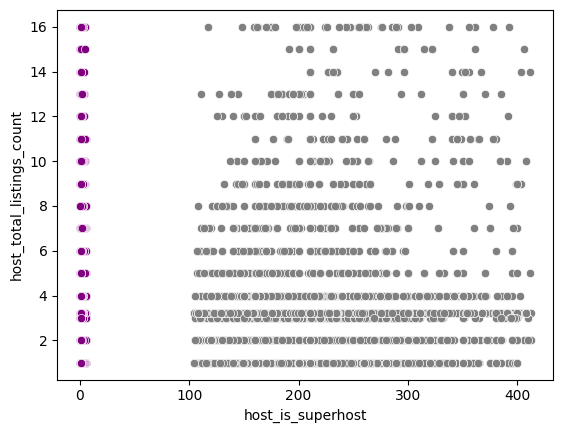

In [45]:
from turtle import color
sns.scatterplot(x='host_is_superhost', y='host_total_listings_count', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='host_total_listings_count', color="purple", data=df)
sns.scatterplot(x='price', y='host_total_listings_count', color="grey", data=df)

In [46]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'reviews_per_month','price']]
Var_Dep= df['host_total_listings_count']

In [47]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [48]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.24680289, -0.2409788 ,  0.00515465]),
 'rank_': 3,
 'singular_': array([4663.65140847,   96.07292594,   34.09945739]),
 'intercept_': np.float64(2.281231804632613)}

In [49]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.027008864727347648

In [50]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_is_superhost', 'reviews_per_month','price']])
y_pred

array([3.76323286, 2.25423708, 2.86496088, ..., 4.19749977, 2.58986849,
       2.53832196], shape=(5415,))

In [51]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples3New', y_pred)
df

,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,3.763233,0.526369,0.967067,1,1.00,1,1,1,84581,461471.0,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,2.254237,0.604656,1.019561,2,0.96,1,1,0,88873,485048.0,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,2.864961,0.562498,0.793647,3,0.99,0,1,1,137808,673625.0,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,2.964918,0.640056,0.913463,4,1.00,1,1,0,252996,1090010.0,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,2.967934,0.634304,0.920621,6,1.00,1,1,1,270374,1090010.0,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,2.744508,0.630347,0.743185,6225,0.98,0,1,0,1234371078098610539,151936855.0,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,3.496467,0.611316,0.967752,6226,1.00,1,1,1,1234536628221406790,96784548.0,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,4.197500,0.519934,0.989669,6227,0.90,1,1,0,1235102258503641649,49758789.0,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,2.589868,0.636172,0.738350,6228,0.00,0,1,1,1235296169504767618,9765814.0,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='host_is_superhost', ylabel='host_total_listings_count'>

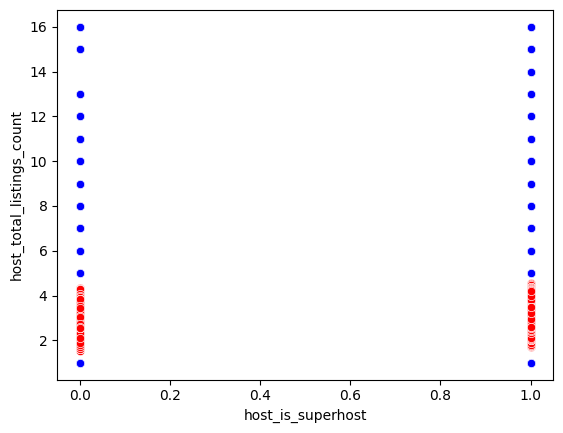

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='PrediccionesMultiples3New', color="red", data=df)


Regresión multiple room_type

<Axes: xlabel='bedrooms', ylabel='accommodates'>

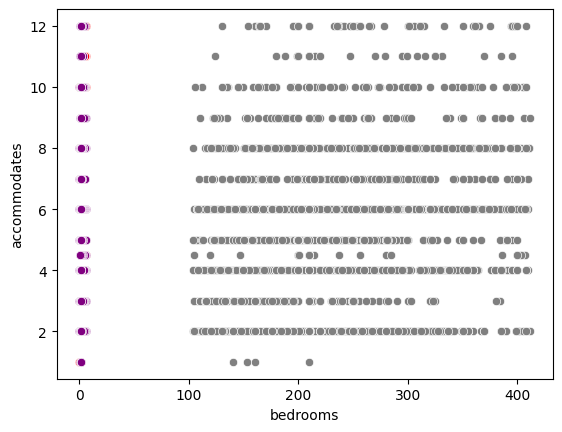

In [53]:
from turtle import color
sns.scatterplot(x='bedrooms', y='accommodates', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='accommodates', color="purple", data=df)
sns.scatterplot(x='price', y='accommodates', color="grey", data=df)

In [54]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'reviews_per_month','price']]
Var_Dep= df['accommodates']

In [55]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [56]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'reviews_per_month', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.74319972e+00, -1.30610152e-02,  1.01755692e-03]),
 'rank_': 3,
 'singular_': array([4663.70664475,   95.32621961,   79.10051758]),
 'intercept_': np.float64(0.7449536258313971)}

In [57]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7293242906586554

In [58]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['bedrooms', 'reviews_per_month','price']])
y_pred

array([6.26221481, 4.30878521, 4.43941504, ..., 6.35587869, 2.60084422,
       4.33386837], shape=(5415,))

In [59]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples4', y_pred)
df

,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,6.262215,3.763233,0.526369,0.967067,1,1.00,1,1,1,84581,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,4.308785,2.254237,0.604656,1.019561,2,0.96,1,1,0,88873,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,4.439415,2.864961,0.562498,0.793647,3,0.99,0,1,1,137808,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,2.593032,2.964918,0.640056,0.913463,4,1.00,1,1,0,252996,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,2.599839,2.967934,0.634304,0.920621,6,1.00,1,1,1,270374,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,2.631371,2.744508,0.630347,0.743185,6225,0.98,0,1,0,1234371078098610539,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,2.731092,3.496467,0.611316,0.967752,6226,1.00,1,1,1,1234536628221406790,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,6.355879,4.197500,0.519934,0.989669,6227,0.90,1,1,0,1235102258503641649,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,2.600844,2.589868,0.636172,0.738350,6228,0.00,0,1,1,1235296169504767618,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='price', ylabel='host_total_listings_count'>

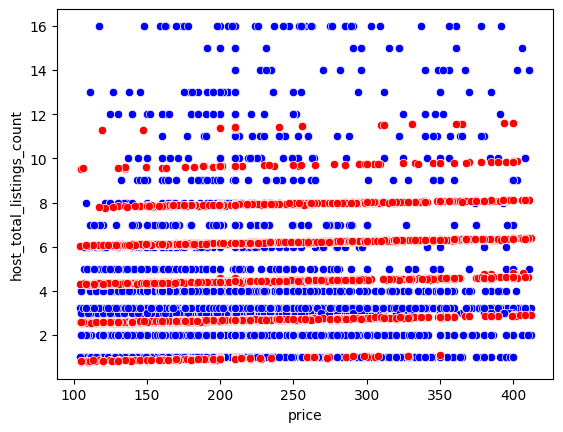

In [60]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='price', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='price', y='PrediccionesMultiples4', color="red", data=df)


In [61]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7293242906586554

In [62]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8540048540018116)

Regresión multiple bedrooms

<Axes: xlabel='accommodates', ylabel='bedrooms'>

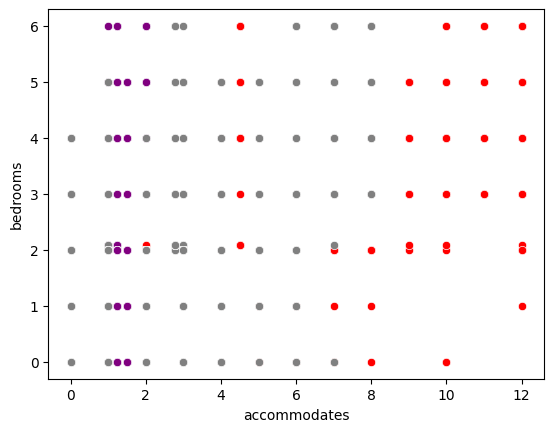

In [63]:
from turtle import color
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=df)
sns.scatterplot(x='bathrooms', y='bedrooms', color="purple", data=df)
sns.scatterplot(x='beds', y='bedrooms', color="grey", data=df)

In [64]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'bathrooms','beds']]
Var_Dep= df['bedrooms']

In [65]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [66]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bathrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.35192826, 0.22956304, 0.08533895]),
 'rank_': 3,
 'singular_': array([196.1927961 ,  61.3971023 ,  25.67650933]),
 'intercept_': np.float64(-0.003852754870222075)}

In [67]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7395075234394166

In [68]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['accommodates', 'bathrooms','beds']])
y_pred

array([4.13466135, 1.88944017, 3.96398345, ..., 2.82285972, 1.01490575,
       1.80410122], shape=(5415,))

In [69]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples5', y_pred)
df

,PrediccionesMultiples5,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,4.134661,6.262215,3.763233,0.526369,0.967067,1,1.00,1,1,1,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,1.889440,4.308785,2.254237,0.604656,1.019561,2,0.96,1,1,0,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,3.963983,4.439415,2.864961,0.562498,0.793647,3,0.99,0,1,1,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,1.014906,2.593032,2.964918,0.640056,0.913463,4,1.00,1,1,0,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,1.622851,2.599839,2.967934,0.634304,0.920621,6,1.00,1,1,1,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,1.014906,2.631371,2.744508,0.630347,0.743185,6225,0.98,0,1,0,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,1.014906,2.731092,3.496467,0.611316,0.967752,6226,1.00,1,1,1,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,2.822860,6.355879,4.197500,0.519934,0.989669,6227,0.90,1,1,0,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,1.014906,2.600844,2.589868,0.636172,0.738350,6228,0.00,0,1,1,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='accommodates', ylabel='bedrooms'>

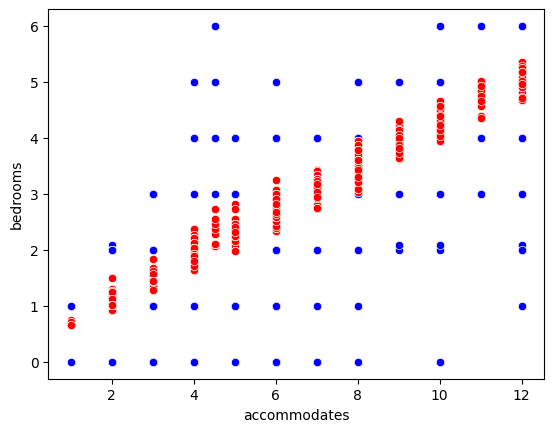

In [70]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=df)
sns.scatterplot(x='accommodates', y='PrediccionesMultiples5', color="red", data=df)


Regresión multiple Price

<Axes: xlabel='availability_90', ylabel='price'>

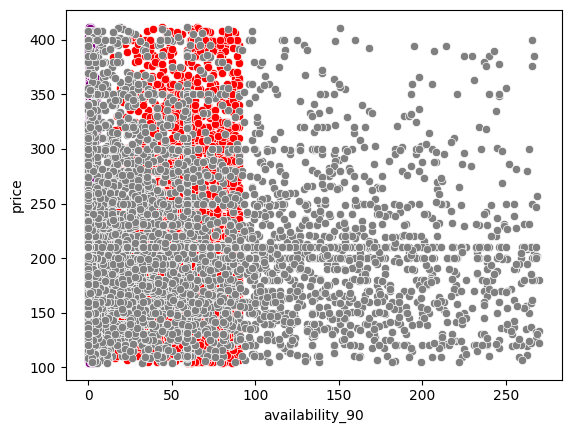

In [71]:
from turtle import color
sns.scatterplot(x='availability_90', y='price', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="purple", data=df)
sns.scatterplot(x='number_of_reviews', y='price', color="grey", data=df)

In [72]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['availability_90', 'reviews_per_month','number_of_reviews']]
Var_Dep= df['price']

In [73]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [74]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_90', 'reviews_per_month', 'number_of_reviews'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.03816741, -5.27236254, -0.0332787 ]),
 'rank_': 3,
 'singular_': array([4683.6619755 , 1362.47511067,   85.62686134]),
 'intercept_': np.float64(225.89849809496476)}

In [75]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.015450365078172212

In [76]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['availability_90', 'reviews_per_month','number_of_reviews']])
y_pred

array([212.22909156, 201.48626704, 207.44970922, ..., 215.47090554,
       214.55488781, 214.97472927], shape=(5415,))

In [77]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples6', y_pred)
df

,PrediccionesMultiples6,PrediccionesMultiples5,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,212.229092,4.134661,6.262215,3.763233,0.526369,0.967067,1,1.00,1,1,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,201.486267,1.889440,4.308785,2.254237,0.604656,1.019561,2,0.96,1,1,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,207.449709,3.963983,4.439415,2.864961,0.562498,0.793647,3,0.99,0,1,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,217.531459,1.014906,2.593032,2.964918,0.640056,0.913463,4,1.00,1,1,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,216.143980,1.622851,2.599839,2.967934,0.634304,0.920621,6,1.00,1,1,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,217.150271,1.014906,2.631371,2.744508,0.630347,0.743185,6225,0.98,0,1,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,215.089231,1.014906,2.731092,3.496467,0.611316,0.967752,6226,1.00,1,1,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,215.470906,2.822860,6.355879,4.197500,0.519934,0.989669,6227,0.90,1,1,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,214.554888,1.014906,2.600844,2.589868,0.636172,0.738350,6228,0.00,0,1,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='availability_90', ylabel='price'>

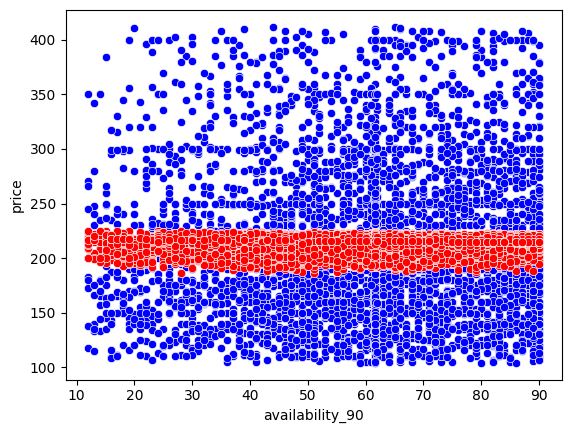

In [78]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='availability_90', y='price', color="blue", data=df)
sns.scatterplot(x='availability_90', y='PrediccionesMultiples6', color="red", data=df)

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.015450365078172212

In [80]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.12429949749766574)

Regresión multiple reviews_per_month

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

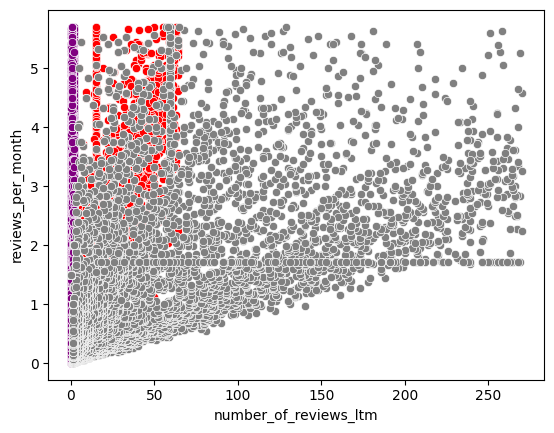

In [81]:
from turtle import color
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="red", data=df)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="purple", data=df)
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="grey", data=df)

In [82]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']]
Var_Dep= df['reviews_per_month']

In [83]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [84]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.05586016, 0.16402866, 0.00204752]),
 'rank_': 3,
 'singular_': array([4708.89632033, 1000.4752309 ,   43.71578279]),
 'intercept_': np.float64(0.6897388825206163)}

In [85]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5650565703439265

In [86]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']])
y_pred

array([1.91577618, 4.06096081, 3.61407955, ..., 0.68973888, 0.68973888,
       0.68973888], shape=(5415,))

In [87]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples7', y_pred)
df

,PrediccionesMultiples7,PrediccionesMultiples6,PrediccionesMultiples5,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,1.915776,212.229092,4.134661,6.262215,3.763233,0.526369,0.967067,1,1.00,1,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,4.060961,201.486267,1.889440,4.308785,2.254237,0.604656,1.019561,2,0.96,1,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,3.614080,207.449709,3.963983,4.439415,2.864961,0.562498,0.793647,3,0.99,0,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,1.410637,217.531459,1.014906,2.593032,2.964918,0.640056,0.913463,4,1.00,1,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,0.975498,216.143980,1.622851,2.599839,2.967934,0.634304,0.920621,6,1.00,1,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,0.689739,217.150271,1.014906,2.631371,2.744508,0.630347,0.743185,6225,0.98,0,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,0.689739,215.089231,1.014906,2.731092,3.496467,0.611316,0.967752,6226,1.00,1,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,0.689739,215.470906,2.822860,6.355879,4.197500,0.519934,0.989669,6227,0.90,1,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,0.689739,214.554888,1.014906,2.600844,2.589868,0.636172,0.738350,6228,0.00,0,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


<Axes: xlabel='number_of_reviews_l30d', ylabel='reviews_per_month'>

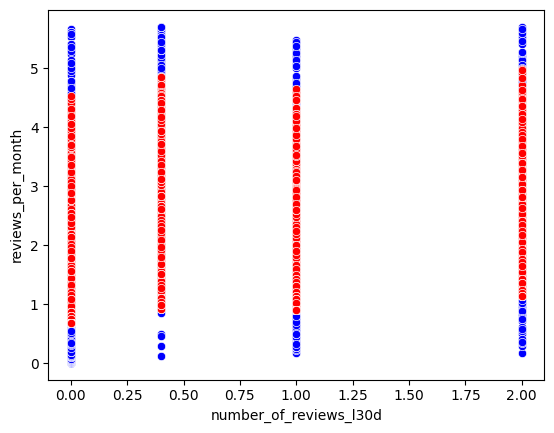

In [88]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="blue", data=df)
sns.scatterplot(x='number_of_reviews_l30d', y='PrediccionesMultiples7', color="red", data=df)
